In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from data_cleaning.data_cleaner import DataCleaner

print(tf.__version__)


2.16.2


# Linear Regression for Sea Level 1

**inputs**: Year, Country, Sea level rise, Average rainfall  
**output**: Average temperature

In [5]:
# Current working directory
current_directory = os.getcwd()

# Go up one directory to the root
root = os.path.abspath(os.path.join(current_directory, ".."))

# Get the path to the data
data_path = os.path.join(root, 'clean-data/processed_Sea_level_1_data.csv')

dc: DataCleaner = DataCleaner(data_path)
dc.preview(10)


,Year,Country,Avg Temperature (°C),Sea Level Rise (mm),Rainfall (mm)
0,2000,Argentina,16.900000,4.000000,2047.000000
1,2000,Australia,11.933333,2.266667,2033.333333
2,2000,Brazil,31.200000,3.700000,803.000000
3,2000,Canada,19.300000,2.650000,1383.000000
4,2000,China,26.200000,2.200000,1849.000000
5,2000,France,16.600000,2.800000,1819.666667
6,2000,Germany,9.750000,1.450000,2641.000000
7,2000,India,21.250000,3.250000,1124.500000
8,2000,Indonesia,23.585714,3.242857,1781.428571
9,2000,Mexico,16.900000,1.200000,1974.500000


# One Hot Encode the Country Column

In [6]:
df_copy = dc.df.copy()

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
country_encoded = encoder.fit_transform(dc.df[['Country']])
country_columns = encoder.get_feature_names_out(['Country'])

df_encoded = pd.concat([dc.df.drop(columns=['Country']), pd.DataFrame(country_encoded, columns=country_columns)], axis=1)
print(df_encoded)

     Year  Avg Temperature (°C)  Sea Level Rise (mm)  Rainfall (mm)  \
0    2000             16.900000             4.000000    2047.000000   
1    2000             11.933333             2.266667    2033.333333   
2    2000             31.200000             3.700000     803.000000   
3    2000             19.300000             2.650000    1383.000000   
4    2000             26.200000             2.200000    1849.000000   
..    ...                   ...                  ...            ...   
335  2023             20.000000             2.750000    1772.500000   
336  2023             30.900000             3.300000     979.000000   
337  2023             19.600000             2.700000    1260.500000   
338  2023             30.300000             2.750000    1503.000000   
339  2023             16.257143             2.671429    1532.000000   

     Country_Argentina  Country_Australia  Country_Brazil  Country_Canada  \
0                  1.0                0.0             0.0             

# Extract features and target

In [7]:
X = df_encoded["Year"].values.reshape(-1, 1) # 2D column vector
X = np.hstack((X, df_encoded.drop(columns=["Avg Temperature (°C)", "Year"]).values)) # remove target column and year column (already included) stack year and other features horizontally, shape: (n_samples, total_features)
Y = df_encoded["Avg Temperature (°C)"].values.reshape(-1, 1) # 2D column vector

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the Linear Regression Model

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_dim=X.shape[1], activation='linear')  # Linear Regression
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the Model

In [9]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model

In [10]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=5, validation_split=0.2, verbose=1)

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 379803.6250 - val_loss: 246804.7500
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 213525.2812 - val_loss: 130366.1484
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 110525.3203 - val_loss: 63151.4961
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 52809.0625 - val_loss: 28755.7324
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23140.9512 - val_loss: 13095.9395
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11528.0781 - val_loss: 6671.9507
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6054.4263 - val_loss: 4318.1470
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4847.1113 - val_loss: 3507.7207
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4068.5679 - val_loss: 3245.3191
Epoch 10/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3671.8958 - val_loss: 3107.1228
Epoch 11/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3545.1152 - v

# Predict on the Test Set

In [14]:
Y_pred = model.predict(X_test)
print(f"Y Predictions:\n{Y_pred[:10]}")
print(f"Y Test:\n{Y_test[:10]}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Y Predictions:
[[20.655016]
 [20.320307]
 [19.783403]
 [20.009523]
 [18.819538]
 [19.624027]
 [20.928934]
 [19.375767]
 [18.872852]
 [18.84785 ]]
Y Test:
[[33.3       ]
 [19.2       ]
 [12.05      ]
 [12.06666667]
 [21.9       ]
 [17.275     ]
 [15.4       ]
 [26.8       ]
 [19.6       ]
 [26.65      ]]


# Examine MAE and R^2

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")

MAE: 5.0938


# Plot Predicted VS Actual

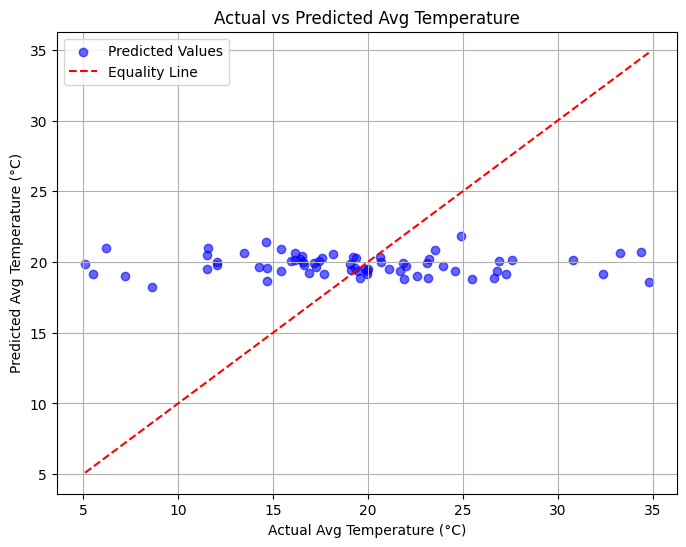

In [16]:
# Flatten arrays for plotting
Y_test_flat = Y_test.flatten()
Y_pred_flat = Y_pred.flatten()

# Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(Y_test_flat, Y_pred_flat, color='blue', alpha=0.6, label='Predicted Values')

# Line of equality (ideal prediction line)
plt.plot([min(Y_test_flat), max(Y_test_flat)], [min(Y_test_flat), max(Y_test_flat)], 
         color='red', linestyle='--', label='Equality Line')

# Labels and title
plt.xlabel('Actual Avg Temperature (°C)')
plt.ylabel('Predicted Avg Temperature (°C)')
plt.title('Actual vs Predicted Avg Temperature')

# Grid and legend
plt.grid(True)
plt.legend()

#plt.savefig("lin_reg_temp_trend.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()
